In [26]:
import pandas as pd
import sqlite3
import numpy as np
from matplotlib import pyplot as plt
import math
import seaborn as sns

In [2]:
conn = sqlite3.connect('assessment.db')
cursor = conn.cursor()

In [3]:
# loading users dataset

users_df = pd.read_csv('C:/Users/vaitl/OneDrive/Desktop/Fetch Rewards/USER_TAKEHOME.csv')
print("File loaded successfully!")

# Display first few rows for verification
print(users_df.head())

File loaded successfully!
                         ID               CREATED_DATE  \
0  5ef3b4f17053ab141787697d  2020-06-24 20:17:54.000 Z   
1  5ff220d383fcfc12622b96bc  2021-01-03 19:53:55.000 Z   
2  6477950aa55bb77a0e27ee10  2023-05-31 18:42:18.000 Z   
3  658a306e99b40f103b63ccf8  2023-12-26 01:46:22.000 Z   
4  653cf5d6a225ea102b7ecdc2  2023-10-28 11:51:50.000 Z   

                  BIRTH_DATE STATE LANGUAGE  GENDER  
0  2000-08-11 00:00:00.000 Z    CA   es-419  female  
1  2001-09-24 04:00:00.000 Z    PA       en  female  
2  1994-10-28 00:00:00.000 Z    FL   es-419  female  
3                        NaN    NC       en     NaN  
4  1972-03-19 00:00:00.000 Z    PA       en  female  


In [4]:
# loading products dataset

products_df = pd.read_csv('C:/Users/vaitl/OneDrive/Desktop/Fetch Rewards/PRODUCTS_TAKEHOME.csv')
print("File loaded successfully!")

# Display first few rows for verification
print(products_df.head())

File loaded successfully!
          CATEGORY_1              CATEGORY_2                   CATEGORY_3  \
0  Health & Wellness           Sexual Health  Conductivity Gels & Lotions   
1             Snacks           Puffed Snacks         Cheese Curls & Puffs   
2  Health & Wellness               Hair Care        Hair Care Accessories   
3  Health & Wellness               Oral Care                   Toothpaste   
4  Health & Wellness  Medicines & Treatments               Essential Oils   

  CATEGORY_4                                       MANUFACTURER  \
0        NaN                                                NaN   
1        NaN                                                NaN   
2        NaN                           PLACEHOLDER MANUFACTURER   
3        NaN                                  COLGATE-PALMOLIVE   
4        NaN  MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...   

             BRAND       BARCODE  
0              NaN  7.964944e+11  
1              NaN  2.327801e+10  
2  

In [5]:
# loading users dataset

transactions_df = pd.read_csv('C:/Users/vaitl/OneDrive/Desktop/Fetch Rewards/TRANSACTION_TAKEHOME.csv')
print("File loaded successfully!")

# Display first few rows for verification
print(transactions_df.head())

File loaded successfully!
                             RECEIPT_ID PURCHASE_DATE  \
0  0000d256-4041-4a3e-adc4-5623fb6e0c99    2024-08-21   
1  0001455d-7a92-4a7b-a1d2-c747af1c8fd3    2024-07-20   
2  00017e0a-7851-42fb-bfab-0baa96e23586    2024-08-18   
3  000239aa-3478-453d-801e-66a82e39c8af    2024-06-18   
4  00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1    2024-07-04   

                   SCAN_DATE STORE_NAME                   USER_ID  \
0  2024-08-21 14:19:06.539 Z    WALMART  63b73a7f3d310dceeabd4758   
1  2024-07-20 09:50:24.206 Z       ALDI  62c08877baa38d1a1f6c211a   
2  2024-08-19 15:38:56.813 Z    WALMART  60842f207ac8b7729e472020   
3  2024-06-19 11:03:37.468 Z  FOOD LION  63fcd7cea4f8442c3386b589   
4  2024-07-05 15:56:43.549 Z   RANDALLS  6193231ae9b3d75037b0f928   

        BARCODE FINAL_QUANTITY FINAL_SALE  
0  1.530001e+10           1.00             
1           NaN           zero       1.49  
2  7.874223e+10           1.00             
3  7.833997e+11           zero       3.4

In [9]:
users_df.to_sql('users', conn, if_exists='replace', index=False)

100000

In [10]:
products_df.to_sql('products', conn, if_exists='replace', index=False)

845552

In [11]:
transactions_df.to_sql('transactions', conn, if_exists='replace', index=False)

50000

In [12]:
# Checking for duplicate rows in each dataset

print("\nDuplicate Rows in Users Dataset:", users_df.duplicated().sum())
print("Duplicate Rows in Products Dataset:", products_df.duplicated().sum())
print("Duplicate Rows in Transactions Dataset:", transactions_df.duplicated().sum())


Duplicate Rows in Users Dataset: 0
Duplicate Rows in Products Dataset: 215
Duplicate Rows in Transactions Dataset: 171


In [28]:
# Drop duplicate rows in products dataset
products_df = products_df.drop_duplicates()
print("Duplicates removed from Products Dataset. New shape:", products_df.shape)

# Drop duplicate rows in transactions dataset
transactions_df = transactions_df.drop_duplicates()
print("Duplicates removed from Transactions Dataset. New shape:", transactions_df.shape)

Duplicates removed from Products Dataset. New shape: (845337, 7)
Duplicates removed from Transactions Dataset. New shape: (49829, 8)


In [13]:
# Checking for missing values in each dataset
print("Missing Values in Users Dataset:")
print(users_df.isnull().sum())

print("\nMissing Values in Products Dataset:")
print(products_df.isnull().sum())

print("\nMissing Values in Transactions Dataset:")
print(transactions_df.isnull().sum())

Missing Values in Users Dataset:
ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

Missing Values in Products Dataset:
CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64

Missing Values in Transactions Dataset:
RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64


In [14]:
# Checking data types of each column
print("\nUsers Dataset Data Types:")
print(users_df.dtypes)

print("\nProducts Dataset Data Types:")
print(products_df.dtypes)

print("\nTransactions Dataset Data Types:")
print(transactions_df.dtypes)


Users Dataset Data Types:
ID              object
CREATED_DATE    object
BIRTH_DATE      object
STATE           object
LANGUAGE        object
GENDER          object
dtype: object

Products Dataset Data Types:
CATEGORY_1       object
CATEGORY_2       object
CATEGORY_3       object
CATEGORY_4       object
MANUFACTURER     object
BRAND            object
BARCODE         float64
dtype: object

Transactions Dataset Data Types:
RECEIPT_ID         object
PURCHASE_DATE      object
SCAN_DATE          object
STORE_NAME         object
USER_ID            object
BARCODE           float64
FINAL_QUANTITY     object
FINAL_SALE         object
dtype: object


In [33]:
# USERS DATASET: Convert Dates to Datetime
users_df['CREATED_DATE'] = users_df['CREATED_DATE'].dt.tz_localize(None)
users_df['BIRTH_DATE'] = users_df['BIRTH_DATE'].dt.tz_localize(None)

# PRODUCTS DATASET
products_df['BARCODE'] = products_df['BARCODE'].astype(str)

# TRANSACTIONS DATASET
transactions_df['PURCHASE_DATE'] = transactions_df['PURCHASE_DATE'].dt.tz_localize(None)
transactions_df['SCAN_DATE'] = transactions_df['SCAN_DATE'].dt.tz_localize(None)
transactions_df['BARCODE'] = transactions_df['BARCODE'].astype(str)
transactions_df['FINAL_QUANTITY'] = pd.to_numeric(transactions_df['FINAL_QUANTITY'], errors='coerce')
transactions_df['FINAL_SALE'] = pd.to_numeric(transactions_df['FINAL_SALE'], errors='coerce')

# Verify the updated data types
print("\nUpdated Users Dataset Data Types:\n", users_df.dtypes)
print("\nUpdated Products Dataset Data Types:\n", products_df.dtypes)
print("\nUpdated Transactions Dataset Data Types:\n", transactions_df.dtypes)


Updated Users Dataset Data Types:
 ID                      object
CREATED_DATE    datetime64[ns]
BIRTH_DATE      datetime64[ns]
STATE                   object
LANGUAGE                object
GENDER                  object
AGE                    float64
dtype: object

Updated Products Dataset Data Types:
 CATEGORY_1      object
CATEGORY_2      object
CATEGORY_3      object
CATEGORY_4      object
MANUFACTURER    object
BRAND           object
BARCODE         object
dtype: object

Updated Transactions Dataset Data Types:
 RECEIPT_ID                object
PURCHASE_DATE     datetime64[ns]
SCAN_DATE         datetime64[ns]
STORE_NAME                object
USER_ID                   object
BARCODE                   object
FINAL_QUANTITY           float64
FINAL_SALE               float64
dtype: object


VISUALIZATIONS FOR USERS DATASET

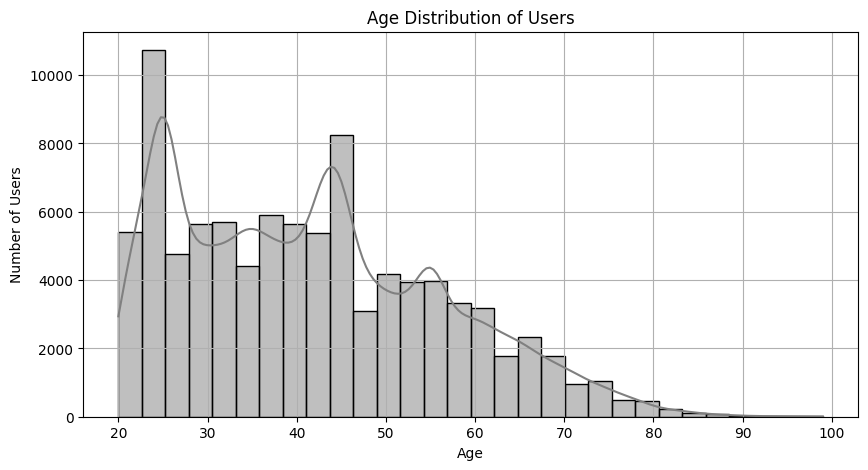

In [53]:
# Convert BIRTH_DATE to datetime and extract birth year
users_df['BIRTH_DATE'] = pd.to_datetime(users_df['BIRTH_DATE'], errors='coerce')
users_df['AGE'] = 2025 - users_df['BIRTH_DATE'].dt.year  # Assuming current year is 2025

# Drop rows where AGE could not be computed
users_df = users_df.dropna(subset=['AGE'])

# Plot Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(users_df['AGE'], bins=30, kde=True, color='gray')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

In [51]:
# Count users with age less than 18 or greater than 100
invalid_age_users = users_df[(users_df['AGE'] < 18) | (users_df['AGE'] > 100)]
print("Number of users with unrealistic ages:", len(invalid_age_users))

Number of users with unrealistic ages: 0


In [52]:
# Drop users with unrealistic ages if the count is small

# Assuming 1500 as a threshold for "too many"
if len(invalid_age_users) < 1500:  
    users_df = users_df[(users_df['AGE'] >= 18) & (users_df['AGE'] <= 100)]
    users_df.reset_index(drop=True, inplace=True)
    print("Unrealistic age users removed. New dataset shape:", users_df.shape)
else:
    print("Too many unrealistic ages. Consider investigating further.")

Unrealistic age users removed. New dataset shape: (92880, 7)


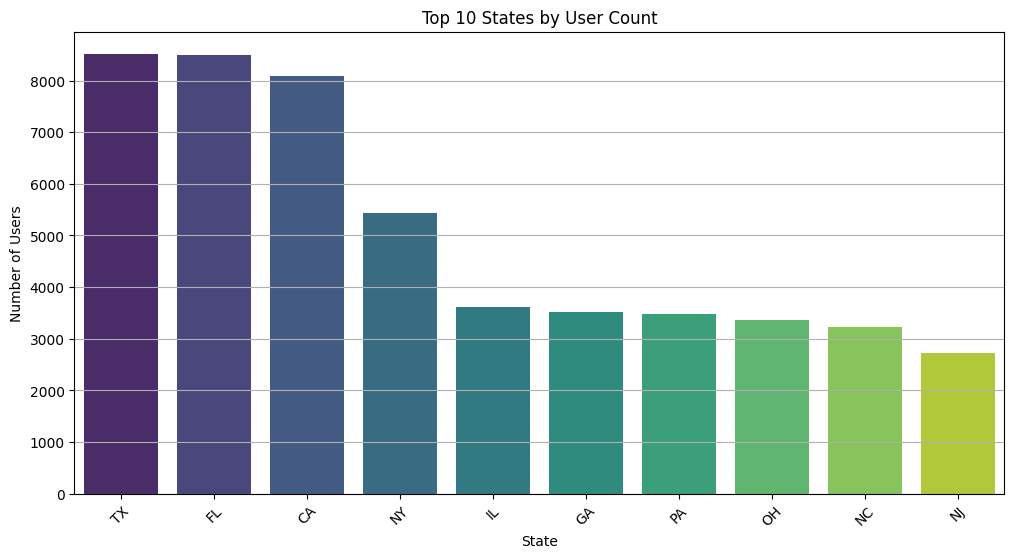

In [24]:
# Replace missing states with 'Unknown'
users_df['STATE'] = users_df['STATE'].fillna('Unknown')

# Count users by state
state_counts = users_df['STATE'].value_counts().head(10)  

# Show top 10 states
# Plot State Distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, hue=state_counts.index, palette='viridis', legend=False)
plt.title('Top 10 States by User Count')
plt.xlabel('State')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [31]:
# Get unique gender values
print("Unique gender values in dataset:", users_df['GENDER'].unique())

# Standardizing gender values
users_df['GENDER'] = users_df['GENDER'].replace({
    'Non-Binary': 'non_binary',  # Standardize capitalization
    'non_binary': 'non_binary',  # Keep consistent format
    "My gender isn't listed": 'not_specified',
    'not_specified': 'not_specified',
    'unknown': 'not_specified',
    'not_listed': 'not_specified',
    'Prefer not to say': 'prefer_not_to_say',
    'prefer_not_to_say': 'prefer_not_to_say'
})

# Ensure missing values remain NaN
users_df['GENDER'] = users_df['GENDER'].replace('', np.nan)  # Convert empty strings to NaN
users_df['GENDER'] = users_df['GENDER'].fillna(np.nan)  # Explicitly keep NaNs

# Count the number of users by gender
gender_counts = users_df['GENDER'].value_counts(dropna=False)  # Includes NaN values
print("\nUser count by gender:\n", gender_counts)

Unique gender values in dataset: ['female' 'male' 'non_binary' 'transgender' nan 'prefer_not_to_say'
 'not_specified']

User count by gender:
GENDER
female               62203
male                 24606
NaN                   2277
transgender           1687
prefer_not_to_say     1263
non_binary             468
not_specified          376
Name: count, dtype: int64


VISUALIZATIONS FOR PRODUCTS DATASET

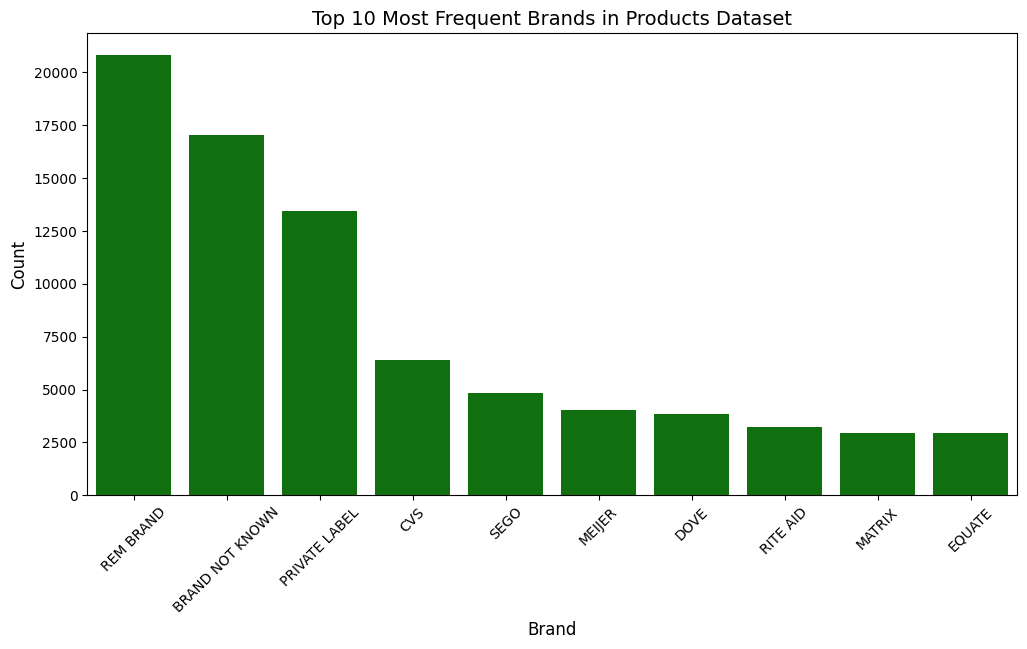

In [43]:
# Count top 10 most frequent brands
top_brands = products_df['BRAND'].dropna().value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.index, y=top_brands.values, color= "green")
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Top 10 Most Frequent Brands in Products Dataset", fontsize=14)
plt.xticks(rotation=45)
plt.show()

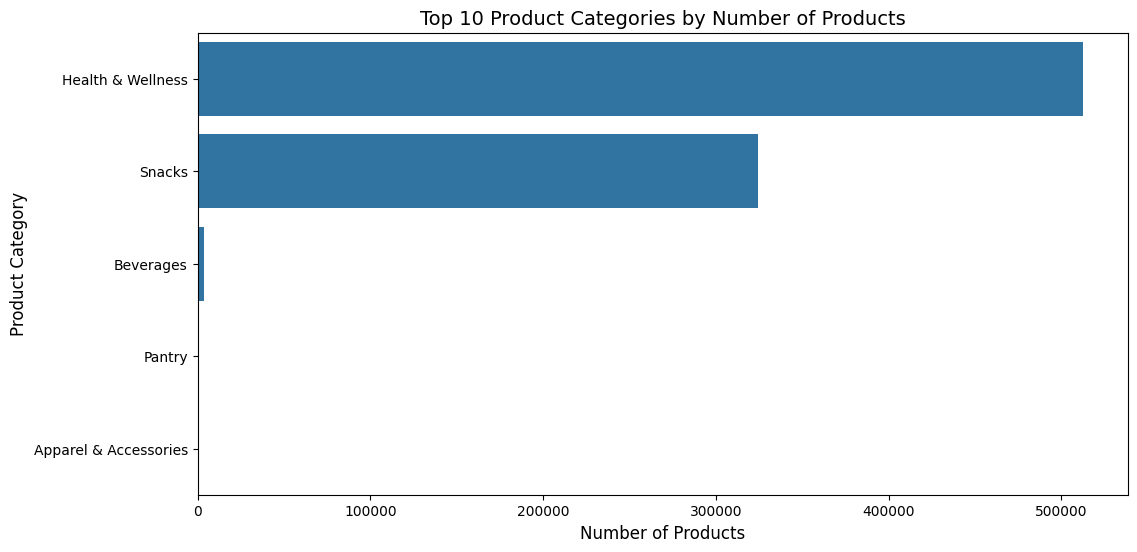

In [39]:
# Count occurrences of each CATEGORY_1
# Top 5 categories
category_counts = products_df['CATEGORY_1'].dropna().value_counts().head(5)  

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(y=category_counts.index, x=category_counts.values)
plt.ylabel("Product Category", fontsize=12)
plt.xlabel("Number of Products", fontsize=12)
plt.title("Top 10 Product Categories by Number of Products", fontsize=14)
plt.show()

In [ ]:
VISUALIZATIONS FOR TRANSACTIONS DATASET

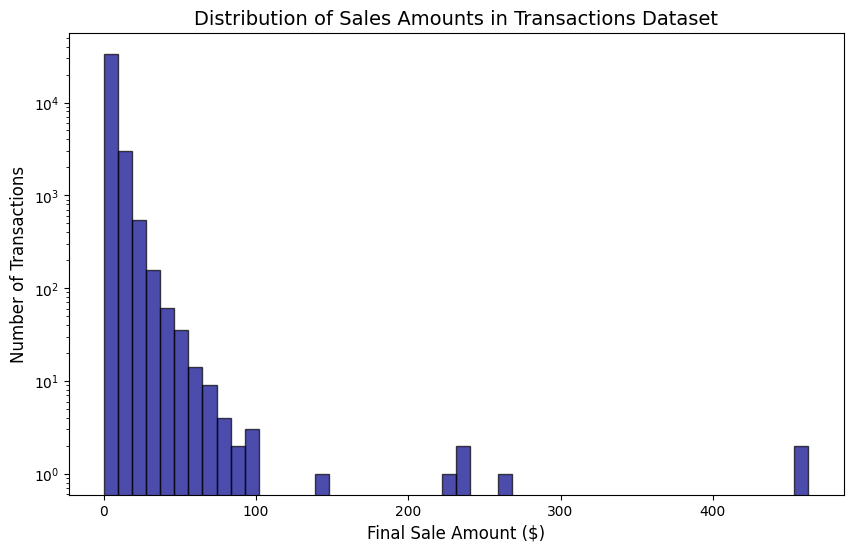

In [55]:
# Plot histogram of FINAL_SALE
plt.figure(figsize=(10, 6))
plt.hist(transactions_df['FINAL_SALE'], bins=50, color='darkblue', edgecolor='black', alpha=0.7)
plt.xlabel("Final Sale Amount ($)", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.title("Distribution of Sales Amounts in Transactions Dataset", fontsize=14)
plt.yscale("log")  # Log scale to handle skewness in data
plt.show()

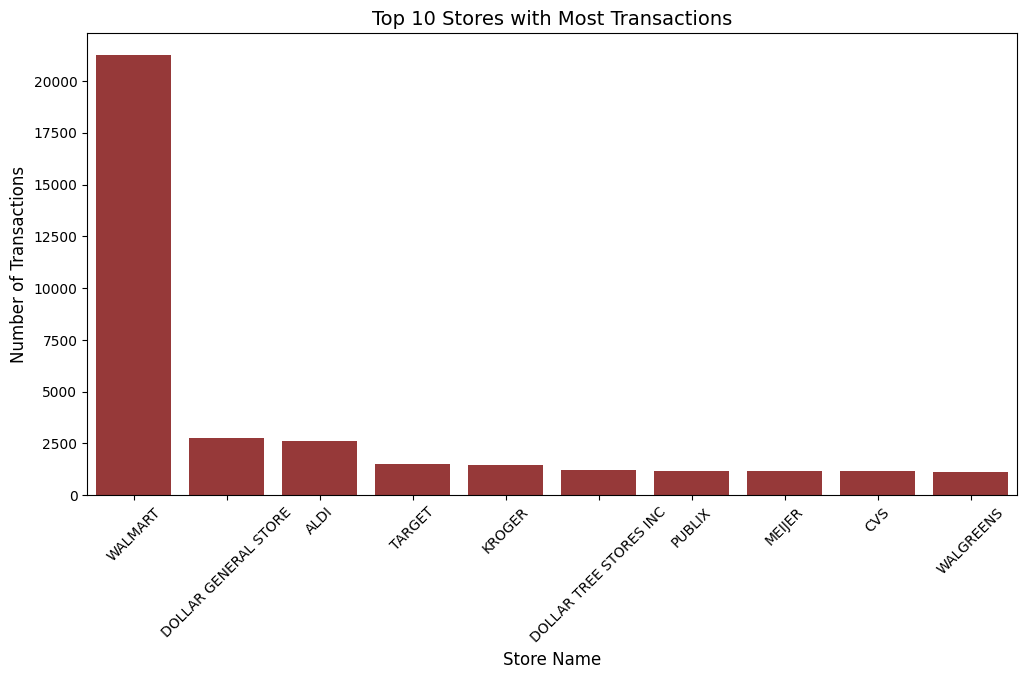

In [42]:
# Count occurrences of each store
top_stores = transactions_df['STORE_NAME'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_stores.index, y=top_stores.values, color="brown")
plt.xlabel("Store Name", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.title("Top 10 Stores with Most Transactions", fontsize=14)
plt.xticks(rotation=45)
plt.show()